In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


In [ ]:
#check the shape of digits data
print(digits.data.shape)
#check the shape of digits target
print(digits.target.shape)


(1797, 64)
(1797,)


In [ ]:
#let us use the linear regression used in the previous lab
#N = digits.data.shape[0] #Number of data points
#d = digits.data.shape[1] #Dimension of data points
A = digits.data
#In the following code, we create a NX1 vector of target labels
# y = 1.0*np.ones([A.shape[0],1])
# for i in range(digits.target.shape[0]):
#   y[i] = digits.target[i]
y = digits.target

In [ ]:
m = A.shape[0]
n = A.shape[1]

In [ ]:
m,n

(1797, 64)

In [ ]:
A

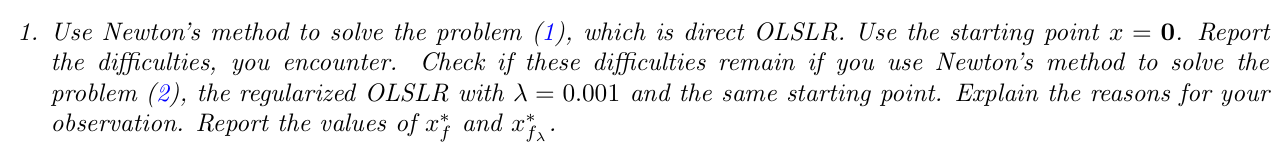

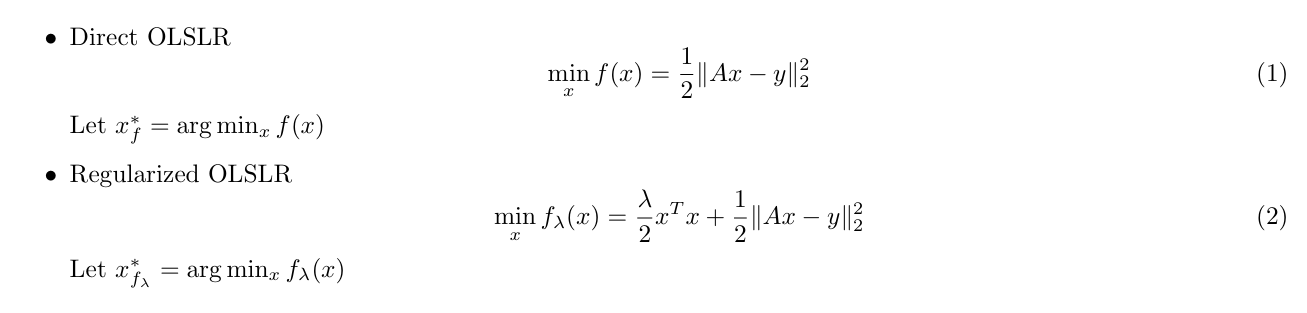

In [ ]:
def fx(x):
  return 0.5*(norm(A@x-y)**2)

def grad_fx(x):
  return np.dot(A.transpose(), A)@x - A.transpose()@y

def hessian_fx():
  return A.transpose()@A

def dk_fx():
  return np.linalg.inv(hessian_fx())

def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx()
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = grad_fx(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks

In [ ]:
#initializations
x0 = np.array([0 for _ in range(n)])
tau = 1e-4
alpha0 = 0.99
rho = 0.5
gamma = 0.5
print("iteration |final minimizer    | final value       |type    ")
print("---------------------------------------------------------------------------")
start = time.time()
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
newtontime = time.time() - start
print(f"{count2}   |{final_xk2}    |{final_val2}     | newton with backtracking")
print("---------------------------------------------------------------------------")

iteration |final minimizer    | final value       |type    
---------------------------------------------------------------------------


LinAlgError: Singular matrix

Report the difficulties, you encounter.
I get Singular Matrix error which means the A matrix is not invertible. Since it is not regularized there are few 0 eigenvalues in the matrix.

In [ ]:
def fx(x, lamda):
  return 0.5*norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_fx(x, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian_fx(lamda):
  return A.transpose()@A + lamda*np.identity(n)

def dk_fx(lamda):
  return np.linalg.inv(hessian_fx(lamda))

def get_alpha_newton(xk, alpha0, rho, gamma, Dk, lamda):
  alpha = alpha0
  pk = -grad_fx(xk, lamda)
  while fx(xk + alpha*Dk@pk, lamda) > (fx(xk, lamda) + gamma*alpha*grad_fx(xk, lamda)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lamda):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk, lamda)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    # print("Norm is: ", norm(pk))
    Dk = dk_fx(lamda)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk, lamda)
    xk = xk - alpha*Dk@pk
    # print("xk is: ", xk)
    pk = grad_fx(xk, lamda)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk, lamda), xks

In [ ]:
#initializations
x0 = np.array([0. for _ in range(n)])
tau = 1e-4
alpha0 = 0.99
rho = 0.5
gamma = 0.5
lamda = 0.001

print("lamda|   iterations  | final minimizer    | final value       |type    ")
print("---------------------------------------------------------------------------")
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lamda)
print(f"{lamda}  | {count2}   |{final_xk2}    |{final_val2}     | newton with backtracking")
print("---------------------------------------------------------------------------")

lamda|   iterations  | final minimizer    | final value       |type    
---------------------------------------------------------------------------
0.001  | 5   |[ 0.00000000e+00  9.69076882e-02 -4.32192762e-03 -7.75916338e-03
  7.49591987e-02  1.13946582e-02 -2.71293921e-02 -7.34410664e-03
  9.98267907e-01 -2.88089376e-02  1.18688356e-01  6.60922719e-02
 -5.57075915e-02 -6.97056149e-02  9.65844014e-02  2.55196013e-01
 -7.29830665e-01  2.42711745e-02  7.73241544e-02 -2.33008498e-02
 -5.64077619e-02  5.72413971e-02 -4.88675248e-02 -2.62555998e-01
 -9.06071169e-01 -1.49769638e-01  5.64022790e-02  8.96665319e-02
  8.39315938e-02  9.85410047e-02  1.69269848e-03 -2.96649688e+00
  0.00000000e+00 -1.54361470e-01 -9.32404639e-03  1.39497978e-01
 -3.69237437e-02  5.46111773e-02 -9.20425586e-03  0.00000000e+00
  1.03326506e-01  1.23983484e-01 -1.37635230e-02  5.40029021e-03
  1.31185700e-01  5.49577815e-02  2.24935899e-02  7.48046265e-03
  6.17507773e-01  2.44100619e-02  1.42356436e-03 -6.211148

In [ ]:
print("Mimizer in case of NEWTON regularized is : ", final_xk2)

Mimizer in case of NEWTON regularized is :  [ 0.00000000e+00  9.69076882e-02 -4.32192762e-03 -7.75916338e-03
  7.49591987e-02  1.13946582e-02 -2.71293921e-02 -7.34410664e-03
  9.98267907e-01 -2.88089376e-02  1.18688356e-01  6.60922719e-02
 -5.57075915e-02 -6.97056149e-02  9.65844014e-02  2.55196013e-01
 -7.29830665e-01  2.42711745e-02  7.73241544e-02 -2.33008498e-02
 -5.64077619e-02  5.72413971e-02 -4.88675248e-02 -2.62555998e-01
 -9.06071169e-01 -1.49769638e-01  5.64022790e-02  8.96665319e-02
  8.39315938e-02  9.85410047e-02  1.69269848e-03 -2.96649688e+00
  0.00000000e+00 -1.54361470e-01 -9.32404639e-03  1.39497978e-01
 -3.69237437e-02  5.46111773e-02 -9.20425586e-03  0.00000000e+00
  1.03326506e-01  1.23983484e-01 -1.37635230e-02  5.40029021e-03
  1.31185700e-01  5.49577815e-02  2.24935899e-02  7.48046265e-03
  6.17507773e-01  2.44100619e-02  1.42356436e-03 -6.21114801e-02
 -2.07024631e-01 -3.38510517e-02  1.05486785e-01 -1.40336482e-01
 -9.82347827e-01 -1.14473639e-01  2.10485229e-

Observations:

When considering the regularized version of linear regression solved using Newton's method, there are several observations one can make, first the objective function becomes strongly convex. Hessian Matrix: Newton's method involves computing and inverting the Hessian matrix of the objective function at each iteration. In the regularized version, the Hessian matrix will be becomes invertible. It converges in 5 iterations with optimal value as 3604.

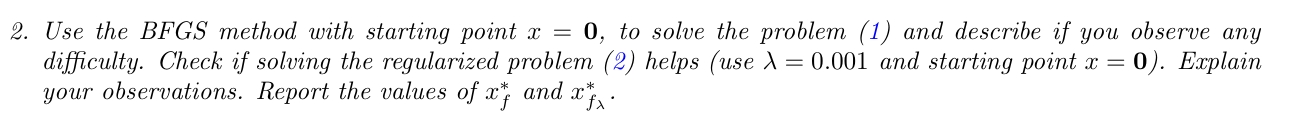

In [ ]:
def fx(x):
  return 0.5*(norm(A@x-y)**2)

def grad_fx(x):
  return np.dot(A.transpose(), A)@x - A.transpose()@y

def hessian_fx():
  return A.transpose()@A

def dk_fx():
  return np.linalg.inv(hessian_fx())


def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Bk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, max_iter=500):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)

    # print("new xk: ", xk[0:5])
    ## new Bk+1 computation
    sk = xnext - xk
    yk = grad_fx(xnext) - grad_fx(xk)
    # BFGS update formula
    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk)
    # print("grad is: ", pk[0:5])
    # print("grad norm is: ", norm(pk))
    xks.append(xk)
    count += 1

  return count, xk, fx(xk), xks


alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau = 1e-4
x0 = [0. for i in range(n)]
start = time.time()
count, minimizer, minimum, xks=bfgs(x0,tau, alpha0, rho, gamma)
bfgstime = time.time() - start
print(f"total iterations: {count} | minimizer: {minimizer} | minimum: {minimum} | type : BFGS")
print("----------------------------------------------------------------")


total iterations: 72 | minimizer: [ 0.00000000e+00  9.69033574e-02 -4.32277224e-03 -7.76028265e-03
  7.49594380e-02  1.13947198e-02 -2.71328237e-02 -7.33176700e-03
  9.98337985e-01 -2.88095539e-02  1.18688288e-01  6.60916267e-02
 -5.57069863e-02 -6.97063703e-02  9.65876431e-02  2.55182256e-01
 -7.29828676e-01  2.42709918e-02  7.73249595e-02 -2.33000280e-02
 -5.64086141e-02  5.72426818e-02 -4.88717673e-02 -2.62467788e-01
 -9.06562689e-01 -1.49767791e-01  5.64019539e-02  8.96663590e-02
  8.39318157e-02  9.85411937e-02  1.69317591e-03 -2.96805716e+00
  0.00000000e+00 -1.54362338e-01 -9.32361231e-03  1.39497628e-01
 -3.69234835e-02  5.46111776e-02 -9.20505054e-03  0.00000000e+00
  1.03279527e-01  1.23983258e-01 -1.37639603e-02  5.40087806e-03
  1.31185107e-01  5.49570760e-02  2.24938236e-02  7.47978020e-03
  6.17754977e-01  2.44122357e-02  1.42333027e-03 -6.21110762e-02
 -2.07025036e-01 -3.38506005e-02  1.05486737e-01 -1.40335958e-01
 -9.84168702e-01 -1.14467154e-01  2.10494892e-02 -4.3607

In [ ]:
def fx(x, lamda):
  return 0.5*norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_fx(x, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian_fx(lamda):
  return A.transpose()@A + lamda*np.identity(n)

def dk_fx(lamda):
  return np.linalg.inv(hessian_fx(lamda))

def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lamda):
  alpha = alpha0
  pk = -grad_fx(xk, lamda)
  while fx(xk + alpha*Bk@pk, lamda) > (fx(xk, lamda) + gamma*alpha*grad_fx(xk, lamda)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, lamda, max_iter=500):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk, lamda)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lamda)
    xnext = xk - alpha*(Bk@pk)

    # print("new xk: ", xk[0:5])
    ## new Bk+1 computation
    sk = xnext - xk
    yk = grad_fx(xnext, lamda) - grad_fx(xk, lamda)
    # BFGS update formula
    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk, lamda)
    # print("grad is: ", pk[0:5])
    # print("grad norm is: ", norm(pk))
    xks.append(xk)
    count += 1

  return count, xk, fx(xk, lamda), xks

alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau = 1e-4
x0 = np.array([0. for i in range(n)])
lamda = 0.001
start = time.time()
count, minimizer, minimum, xks=bfgs(x0,tau, alpha0, rho, gamma, lamda)
bfgstime = time.time() - start
print(f"total iterations: {count} | minimizer: {minimizer} | minimum: {minimum} | type : BFGS")
print("----------------------------------------------------------------")


total iterations: 68 | minimizer: [ 0.00000000e+00  9.69076881e-02 -4.32192770e-03 -7.75916336e-03
  7.49591987e-02  1.13946582e-02 -2.71293920e-02 -7.34410712e-03
  9.98267900e-01 -2.88089377e-02  1.18688356e-01  6.60922719e-02
 -5.57075915e-02 -6.97056149e-02  9.65844013e-02  2.55196014e-01
 -7.29830624e-01  2.42711745e-02  7.73241544e-02 -2.33008497e-02
 -5.64077619e-02  5.72413971e-02 -4.88675247e-02 -2.62556001e-01
 -9.06071285e-01 -1.49769638e-01  5.64022789e-02  8.96665319e-02
  8.39315938e-02  9.85410047e-02  1.69269843e-03 -2.96649682e+00
  0.00000000e+00 -1.54361470e-01 -9.32404638e-03  1.39497978e-01
 -3.69237437e-02  5.46111773e-02 -9.20425589e-03  0.00000000e+00
  1.03326503e-01  1.23983484e-01 -1.37635230e-02  5.40029023e-03
  1.31185700e-01  5.49577815e-02  2.24935899e-02  7.48046265e-03
  6.17507768e-01  2.44100620e-02  1.42356438e-03 -6.21114801e-02
 -2.07024631e-01 -3.38510517e-02  1.05486785e-01 -1.40336481e-01
 -9.82347846e-01 -1.14473639e-01  2.10485230e-02 -4.3608

As observed for BFGS we take 72, 68 observations for normal and regularized version of problem. They take up less ram (as hessian need not be computed) and also worked for non-regularized version of the problem which has singular matrix issue. They also take minimal time to run.